# IPL Dataset Exploratory Data Analysis

This notebook covers the preliminary data analysis of the IPL dataset. We start by loading the data, checking its basic details, performing data cleaning, and preparing it for further analysis.

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Overview

View the first few rows of the dataset to understand the structure of the data.

In [161]:

file_path = 'Ipl-clean-data2008-2023.csv'  
ipl_data = pd.read_csv(file_path)
ipl_data.head()

,Unnamed: 0,season,id,name,short_name,description,home_team,away_team,toss_won,decision,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,4,2023.0,1359544,Royal Challengers Bangalore v Gujarat Titans,RCB v GT,"70th Match (N), Indian Premier League at Benga...",RCB,GT,GT,BOWL FIRST,...,"Virat Kohli (UKN),Faf du Plessis (UKN),Glenn M...","Wriddhiman Saha (WK),Shubman Gill (UKN),Vijay ...","Shubman Gill,Vijay Shankar","Noor Ahmad,Rashid Khan",21 May 2023 - night match (20-over match),Nitin Menon,Virender Sharma,Tapan Sharma,Javagal Srinath,VM Dhokre
1,5,2023.0,1359543,Mumbai Indians v Sunrisers Hyderabad,MI v SRH,"69th Match (D/N), Indian Premier League at Mum...",MI,SRH,MI,BOWL FIRST,...,"Ishan Kishan (WK),Rohit Sharma (UKN),Cameron G...","Vivrant Sharma (AR),Mayank Agarwal (UKN),Heinr...","Mayank Agarwal,Vivrant Sharma","Bhuvneshwar Kumar,Mayank Dagar",21 May 2023 - day/night match (20-over match),KN Ananthapadmanabhan,Rod Tucker,Rohan Pandit,Pankaj Dharmani,Parashar Joshi
2,6,2023.0,1359542,Kolkata Knight Riders v Lucknow Super Giants,KKR v LSG,"68th Match (N), Indian Premier League at Kolka...",KKR,LSG,KKR,BOWL FIRST,...,"Jason Roy (UKN),Venkatesh Iyer (AR),Nitish Ran...","Karan Sharma (AR),Quinton de Kock (WK),Prerak ...","Nicholas Pooran,Quinton de Kock","Ravi Bishnoi,Yash Thakur",20 May 2023 - night match (20-over match),Ulhas Gandhe,Jayaraman Madanagopal,Yeshwant Barde,Manu Nayyar,Mohamed Rafi
3,7,2023.0,1359541,Delhi Capitals v Chennai Super Kings,DC v CSK,"67th Match (D/N), Indian Premier League at Del...",DC,CSK,CSK,BAT FIRST,...,"Prithvi Shaw (UKN),David Warner (UKN),Phil Sal...","Ruturaj Gaikwad (UKN),Devon Conway (UKN),Shiva...","Devon Conway,Ruturaj Gaikwad","Deepak Chahar,Matheesha Pathirana",20 May 2023 - day/night match (20-over match),Chris Gaffaney,Nikhil Patwardhan,Anil Chaudhary,Sanjay Verma,Mohit Krishnadas
4,8,2023.0,1359540,Punjab Kings v Rajasthan Royals,PBKS v RR,"66th Match (N), Indian Premier League at Dhara...",PBKS,RR,RR,BOWL FIRST,...,"Prabhsimran Singh (UKN),Shikhar Dhawan (UKN),A...","Yashasvi Jaiswal (UKN),Jos Buttler (UKN),Devdu...","Devdutt Padikkal,Yashasvi Jaiswal","Navdeep Saini,Adam Zampa",19 May 2023 - night match (20-over match),Nand Kishore,Rod Tucker,Navdeep Singh,Pankaj Dharmani,Parashar Joshi


In [162]:
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        899 non-null    int64  
 1   season            899 non-null    float64
 2   id                899 non-null    int64  
 3   name              899 non-null    object 
 4   short_name        899 non-null    object 
 5   description       899 non-null    object 
 6   home_team         899 non-null    object 
 7   away_team         899 non-null    object 
 8   toss_won          899 non-null    object 
 9   decision          899 non-null    object 
 10  1st_inning_score  899 non-null    object 
 11  2nd_inning_score  899 non-null    object 
 12  winner            899 non-null    object 
 13  result            899 non-null    object 
 14  start_date        899 non-null    object 
 15  end_date          899 non-null    object 
 16  venue_id          899 non-null    int64  
 1

In [163]:
ipl_data.describe(include='all')


,Unnamed: 0,season,id,name,short_name,description,home_team,away_team,toss_won,decision,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
count,899.000000,899.000000,8.990000e+02,899,899,899,899,899,899,899,...,899,899,899,899,899,899,899,899,899,899
unique,NaN,NaN,NaN,196,158,899,15,15,15,2,...,883,887,735,796,899,62,64,68,31,69
top,NaN,NaN,NaN,Royal Challengers Bangalore v Kolkata Knight R...,DC v KKR,"70th Match (N), Indian Premier League at Benga...",RCB,MI,MI,BOWL FIRST,...,"Jacques Kallis (AR),Wasim Jaffer (BT),Robin Ut...","Davy Jacobs (WK),Sachin Tendulkar (BT),Ambati ...","Chris Gayle,Virat Kohli","Harshal Patel,Yuzvendra Chahal",21 May 2023 - night match (20-over match),KN Ananthapadmanabhan,Sundaram Ravi,Anil Chaudhary,Javagal Srinath,Krishnamachari Srinivasan
freq,NaN,NaN,NaN,17,21,1,106,114,116,576,...,2,2,8,4,1,62,112,56,163,59
mean,502.519466,2015.729700,8.782062e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,293.770827,4.596323,3.501428e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.000000,2008.000000,3.359820e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,244.500000,2012.000000,5.483265e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,508.000000,2015.000000,8.298150e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,754.500000,2020.000000,1.216510e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Missing Values Analysis

Identify and address missing values across the dataset.

In [164]:
missing_data = ipl_data.isnull().sum()
missing_data

Unnamed: 0          0
season              0
id                  0
name                0
short_name          0
description         0
home_team           0
away_team           0
toss_won            0
decision            0
1st_inning_score    0
2nd_inning_score    0
winner              0
result              0
start_date          0
end_date            0
venue_id            0
venue_name          0
home_captain        0
away_captain        0
pom                 0
points              0
super_over          0
home_overs          0
home_runs           0
home_wickets        0
home_boundaries     0
away_overs          0
away_runs           0
away_wickets        0
away_boundaries     0
highlights          0
home_key_batsman    0
home_key_bowler     0
home_playx1         0
away_playx1         0
away_key_batsman    0
away_key_bowler     0
match_days          0
umpire1             0
umpire2             0
tv_umpire           0
referee             0
reserve_umpire      0
dtype: int64

## Unique Values Count

Check for the number of unique values in each column to understand the diversity of the dataset.

In [165]:

for column in ipl_data.columns:
    print(f"{column}: {ipl_data[column].nunique()} unique values")

Unnamed: 0: 899 unique values
season: 16 unique values
id: 899 unique values
name: 196 unique values
short_name: 158 unique values
description: 899 unique values
home_team: 15 unique values
away_team: 15 unique values
toss_won: 15 unique values
decision: 2 unique values
1st_inning_score: 530 unique values
2nd_inning_score: 590 unique values
winner: 15 unique values
result: 759 unique values
start_date: 899 unique values
end_date: 667 unique values
venue_id: 35 unique values
venue_name: 37 unique values
home_captain: 59 unique values
away_captain: 61 unique values
pom: 265 unique values
points: 180 unique values
super_over: 2 unique values
home_overs: 54 unique values
home_runs: 150 unique values
home_wickets: 11 unique values
home_boundaries: 34 unique values
away_overs: 56 unique values
away_runs: 152 unique values
away_wickets: 11 unique values
away_boundaries: 34 unique values
highlights: 899 unique values
home_key_batsman: 716 unique values
home_key_bowler: 780 unique values
home_p

## Data Cleaning

Perform data cleaning by converting data types, handling missing values, and removing unnecessary columns.

In [166]:
ipl_data.dropna(inplace=True)
ipl_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        899 non-null    int64  
 1   season            899 non-null    float64
 2   id                899 non-null    int64  
 3   name              899 non-null    object 
 4   short_name        899 non-null    object 
 5   description       899 non-null    object 
 6   home_team         899 non-null    object 
 7   away_team         899 non-null    object 
 8   toss_won          899 non-null    object 
 9   decision          899 non-null    object 
 10  1st_inning_score  899 non-null    object 
 11  2nd_inning_score  899 non-null    object 
 12  winner            899 non-null    object 
 13  result            899 non-null    object 
 14  start_date        899 non-null    object 
 15  end_date          899 non-null    object 
 16  venue_id          899 non-null    int64  
 1

#### Convert data types where necessary

In [167]:
ipl_data['season'] = ipl_data['season'].astype(int)
ipl_data['id'] = ipl_data['id'].astype(int)
ipl_data['1st_inning_score'] = ipl_data['1st_inning_score'].str.extract('(\d+)/?').astype(float).astype(int)
ipl_data['2nd_inning_score'] = ipl_data['2nd_inning_score'].str.extract('(\d+)/?').astype(float).astype(int)
ipl_data['start_date'] = pd.to_datetime(ipl_data['start_date'])
ipl_data['end_date'] = pd.to_datetime(ipl_data['end_date'])
ipl_data['match_month'] = ipl_data['start_date'].dt.month
ipl_data['match_day'] = ipl_data['start_date'].dt.day
ipl_data['match_weekday'] = ipl_data['start_date'].dt.weekday

ipl_data['home_team'] = ipl_data['home_team'].str.strip()
ipl_data['away_team'] = ipl_data['away_team'].str.strip()
ipl_data['winner'] = ipl_data['winner'].str.strip()
ipl_data['toss_won'] = ipl_data['toss_won'].str.strip()
ipl_data['decision'] = ipl_data['decision'].str.strip()
# ipl_data['home_wickets'] = ipl_data['home_wickets'].str.strip()
# ipl_data['away_wickets'] = ipl_data['away_wickets'].str.strip()

columns_to_drop = ['Unnamed: 0']  
ipl_data.drop(columns=columns_to_drop, inplace=True)

ipl_data.head()

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire,match_month,match_day,match_weekday
0,2023,1359544,Royal Challengers Bangalore v Gujarat Titans,RCB v GT,"70th Match (N), Indian Premier League at Benga...",RCB,GT,GT,BOWL FIRST,197,...,"Noor Ahmad,Rashid Khan",21 May 2023 - night match (20-over match),Nitin Menon,Virender Sharma,Tapan Sharma,Javagal Srinath,VM Dhokre,5,21,6
1,2023,1359543,Mumbai Indians v Sunrisers Hyderabad,MI v SRH,"69th Match (D/N), Indian Premier League at Mum...",MI,SRH,MI,BOWL FIRST,200,...,"Bhuvneshwar Kumar,Mayank Dagar",21 May 2023 - day/night match (20-over match),KN Ananthapadmanabhan,Rod Tucker,Rohan Pandit,Pankaj Dharmani,Parashar Joshi,5,21,6
2,2023,1359542,Kolkata Knight Riders v Lucknow Super Giants,KKR v LSG,"68th Match (N), Indian Premier League at Kolka...",KKR,LSG,KKR,BOWL FIRST,176,...,"Ravi Bishnoi,Yash Thakur",20 May 2023 - night match (20-over match),Ulhas Gandhe,Jayaraman Madanagopal,Yeshwant Barde,Manu Nayyar,Mohamed Rafi,5,20,5
3,2023,1359541,Delhi Capitals v Chennai Super Kings,DC v CSK,"67th Match (D/N), Indian Premier League at Del...",DC,CSK,CSK,BAT FIRST,223,...,"Deepak Chahar,Matheesha Pathirana",20 May 2023 - day/night match (20-over match),Chris Gaffaney,Nikhil Patwardhan,Anil Chaudhary,Sanjay Verma,Mohit Krishnadas,5,20,5
4,2023,1359540,Punjab Kings v Rajasthan Royals,PBKS v RR,"66th Match (N), Indian Premier League at Dhara...",PBKS,RR,RR,BOWL FIRST,187,...,"Navdeep Saini,Adam Zampa",19 May 2023 - night match (20-over match),Nand Kishore,Rod Tucker,Navdeep Singh,Pankaj Dharmani,Parashar Joshi,5,19,4


<Axes: ylabel='Frequency'>

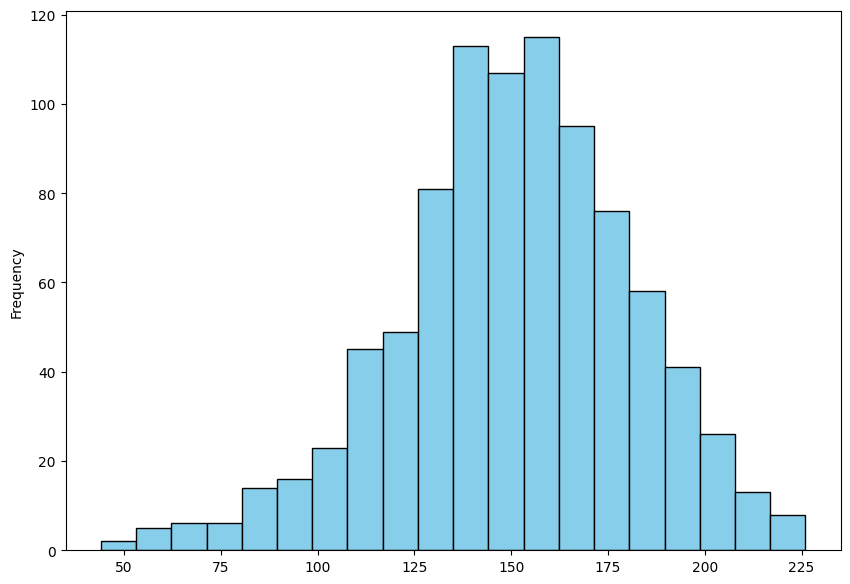

In [168]:
ipl_data['2nd_inning_score'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', figsize=(10, 7))

# Univariate Analysis


## Numerical Variables

In [169]:
numerical_cols = ['1st_inning_score', '2nd_inning_score', 'home_runs', 'away_runs', 'home_wickets', 'away_wickets']
ipl_data[numerical_cols].describe()

,1st_inning_score,2nd_inning_score,home_runs,away_runs,home_wickets,away_wickets
count,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000
mean,163.909900,150.650723,158.746385,155.814238,5.751947,5.905451
std,30.824305,30.735931,31.665220,31.238539,2.390051,2.511657
min,67.000000,44.000000,58.000000,44.000000,0.000000,0.000000
25%,145.000000,133.000000,138.500000,136.000000,4.000000,4.000000
50%,164.000000,152.000000,160.000000,158.000000,6.000000,6.000000
75%,184.000000,171.000000,180.000000,176.000000,8.000000,8.000000
max,263.000000,226.000000,263.000000,257.000000,10.000000,10.000000


In [170]:

ipl_data[numerical_cols].mode()
ipl_data[numerical_cols].var()
ipl_data[numerical_cols].std()


1st_inning_score    30.824305
2nd_inning_score    30.735931
home_runs           31.665220
away_runs           31.238539
home_wickets         2.390051
away_wickets         2.511657
dtype: float64

Histograms and Density Plots
1st Inning Runs Distribution

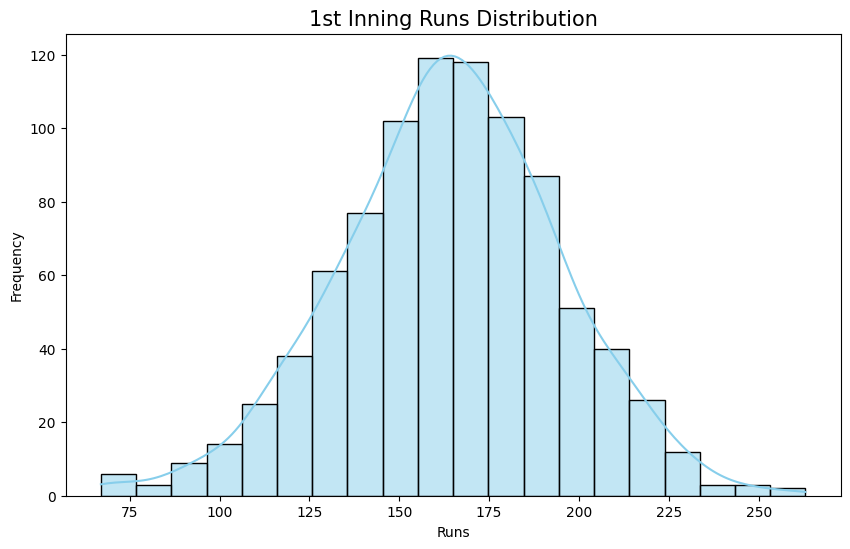

In [171]:
plt.figure(figsize=(10, 6))
sns.histplot(ipl_data['1st_inning_score'], kde=True, bins=20, color='skyblue')
plt.title('1st Inning Runs Distribution', fontsize=15)
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

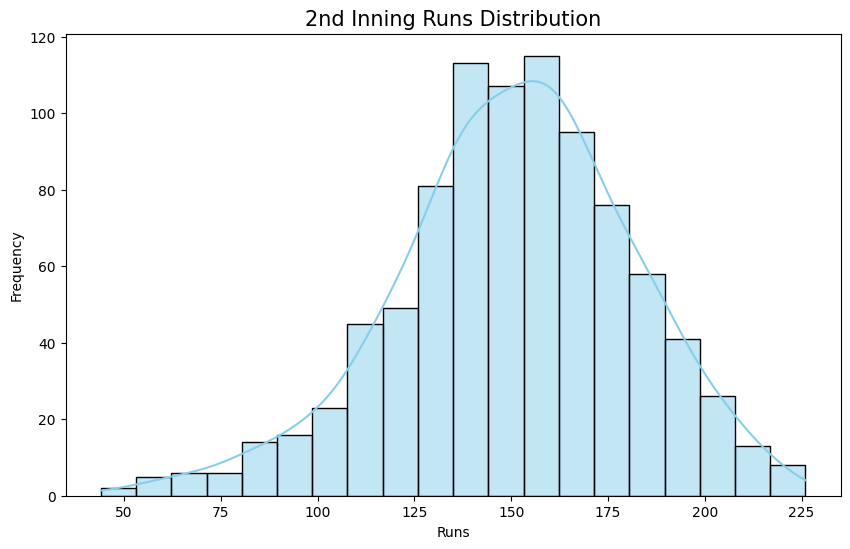

In [172]:
plt.figure(figsize=(10, 6))
sns.histplot(ipl_data['2nd_inning_score'], kde=True, bins=20, color='skyblue')
plt.title('2nd Inning Runs Distribution', fontsize=15)
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

Inference: The peak in 2nd inings score is more spreaded as compared to 1st inning score.
Alos, 1st inings has more numbers of scores >200 as compared to 2nd inning. which is often we see, as the team batting 2nd has to chase the target and they have to take more risk to chase the target. 

#### Boxplots - Home run

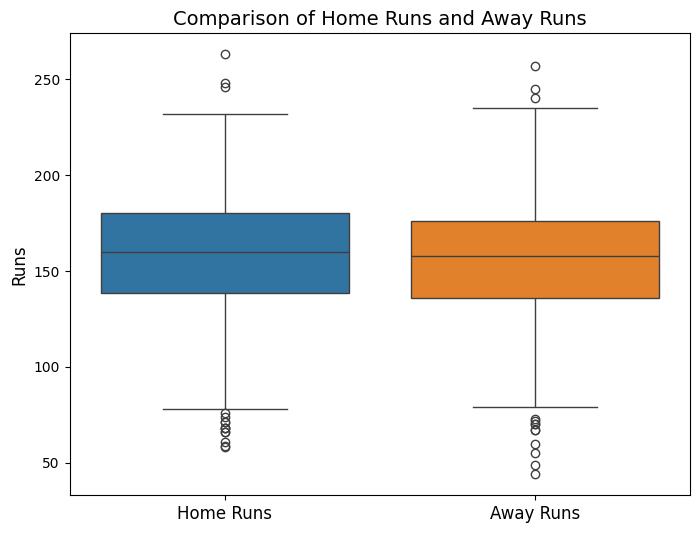

In [173]:
plt.figure(figsize=(8, 6))

sns.boxplot(data=ipl_data[['home_runs', 'away_runs']])
plt.title('Comparison of Home Runs and Away Runs', fontsize=14)
plt.ylabel('Runs', fontsize=12)
plt.xticks([0, 1], ['Home Runs', 'Away Runs'], fontsize=12)
plt.show()

inference: The median is almost similar for both the innings.

c:\Users\preet\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


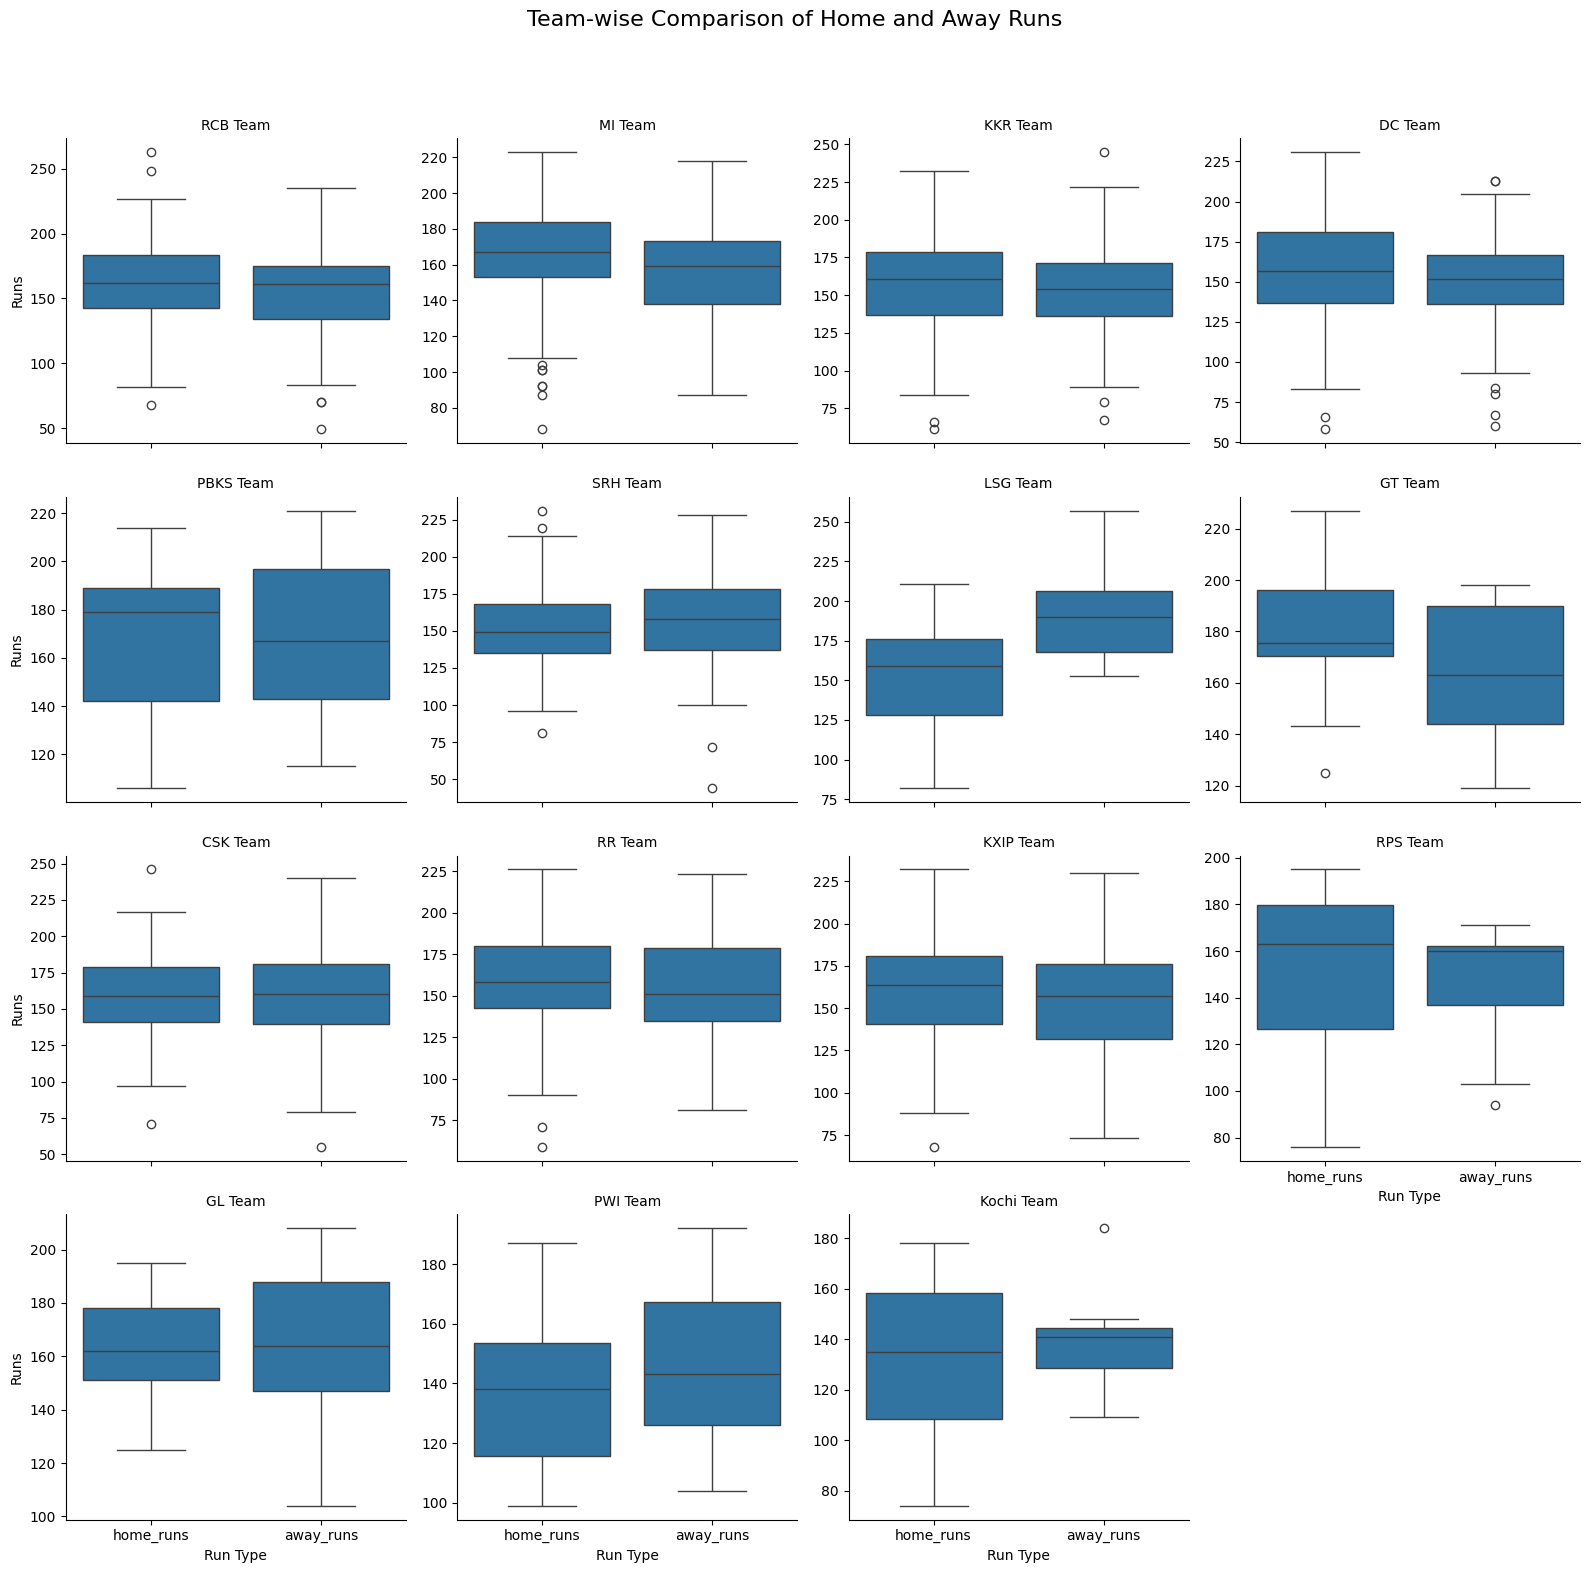

In [174]:
ipl_data_melted = pd.melt(ipl_data, 
                          id_vars=['home_team', 'away_team'], 
                          value_vars=['home_runs', 'away_runs'],
                          var_name='Run_Type', 
                          value_name='Runs')

ipl_data_melted['team'] = ipl_data_melted.apply(lambda row: row['home_team'] if row['Run_Type'] == 'home_runs' else row['away_team'], axis=1)

ipl_data_melted = ipl_data_melted.drop(columns=['home_team', 'away_team'])

g = sns.FacetGrid(ipl_data_melted, col="team", col_wrap=4, height=4, sharey=False)

g.map(sns.boxplot, 'Run_Type', 'Runs')

g.set_titles("{col_name} Team")
g.set_axis_labels("Run Type", "Runs")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Team-wise Comparison of Home and Away Runs', fontsize=16)
plt.show()


c:\Users\preet\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


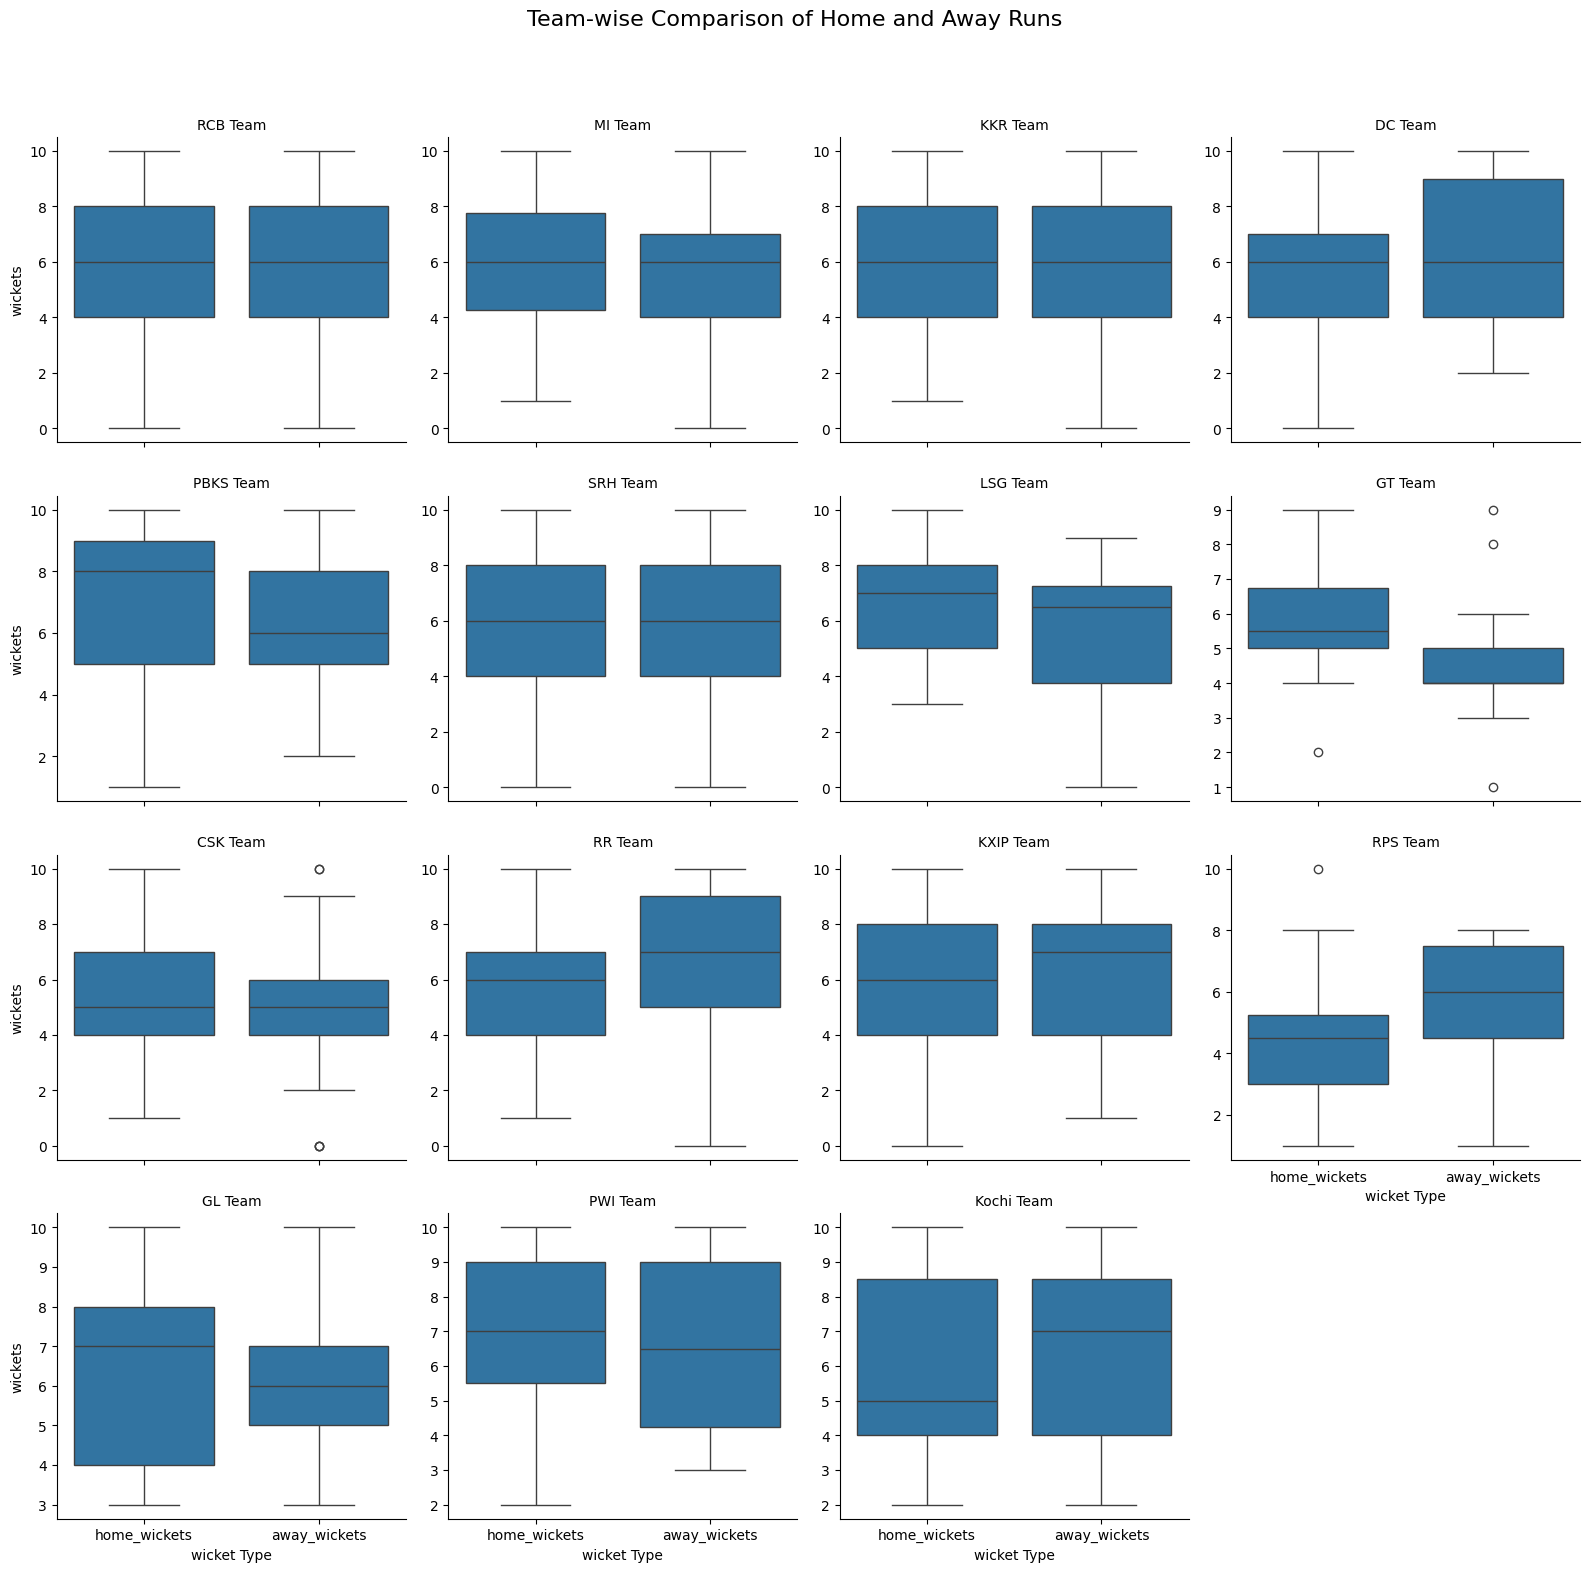

In [175]:
ipl_data_melted = pd.melt(ipl_data, 
                          id_vars=['home_team', 'away_team'], 
                          value_vars=['home_wickets', 'away_wickets'],
                          var_name='wicket_Type', 
                          value_name='wickets')

ipl_data_melted['team'] = ipl_data_melted.apply(lambda row: row['home_team'] if row['wicket_Type'] == 'home_wickets' else row['away_team'], axis=1)

ipl_data_melted = ipl_data_melted.drop(columns=['home_team', 'away_team'])

g = sns.FacetGrid(ipl_data_melted, col="team", col_wrap=4, height=4, sharey=False)

g.map(sns.boxplot, 'wicket_Type', 'wickets')

g.set_titles("{col_name} Team")
g.set_axis_labels("wicket Type", "wickets")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Team-wise Comparison of Home and Away Runs', fontsize=16)
plt.show()


c:\Users\preet\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


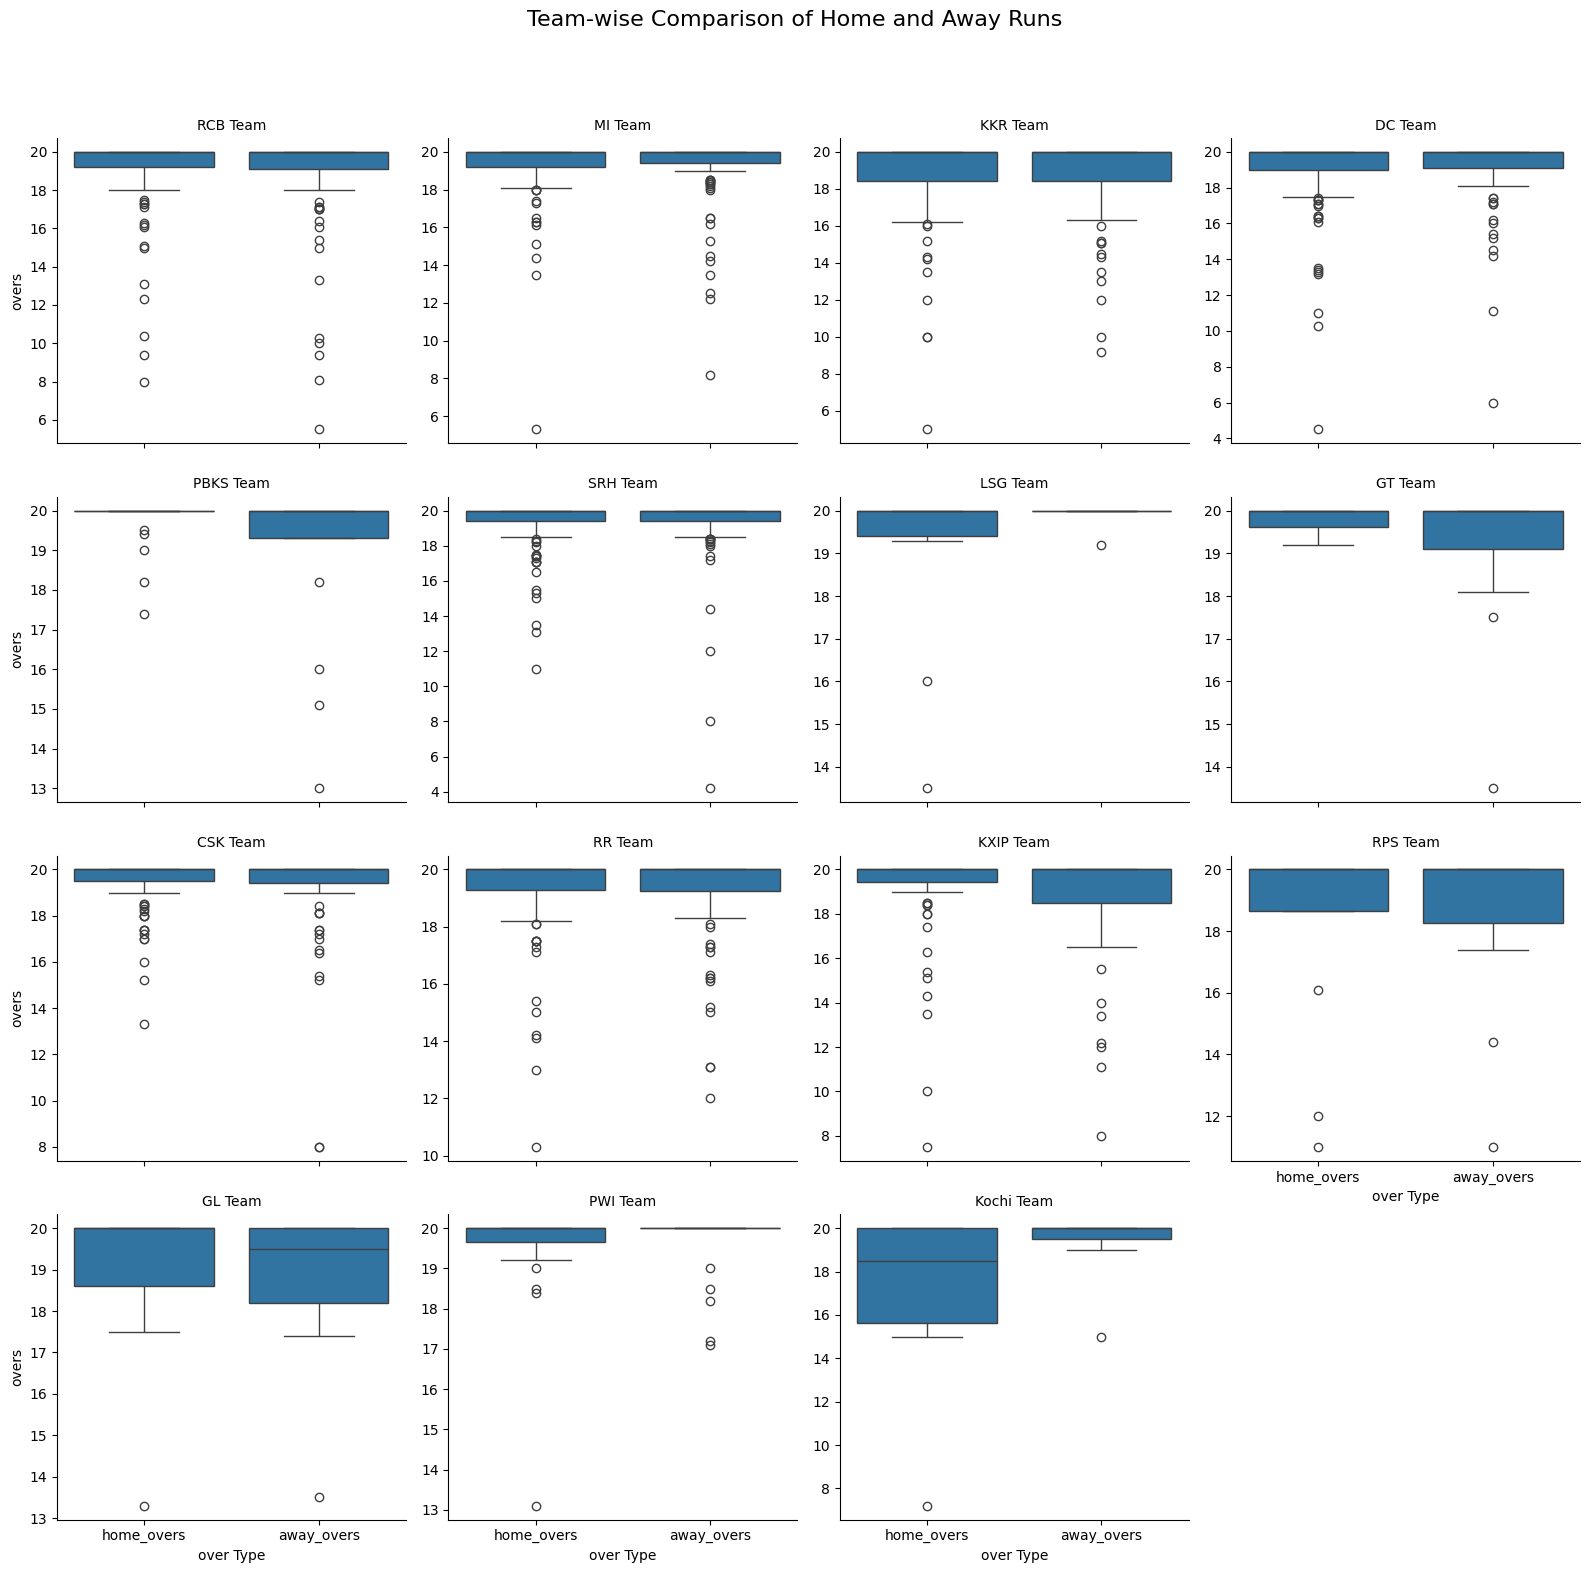

In [176]:
ipl_data_melted = pd.melt(ipl_data, 
                          id_vars=['home_team', 'away_team'], 
                          value_vars=['home_overs', 'away_overs'],
                          var_name='over_Type', 
                          value_name='overs')

ipl_data_melted['team'] = ipl_data_melted.apply(lambda row: row['home_team'] if row['over_Type'] == 'home_overs' else row['away_team'], axis=1)

ipl_data_melted = ipl_data_melted.drop(columns=['home_team', 'away_team'])

g = sns.FacetGrid(ipl_data_melted, col="team", col_wrap=4, height=4, sharey=False)

g.map(sns.boxplot, 'over_Type', 'overs')

g.set_titles("{col_name} Team")
g.set_axis_labels("over Type", "overs")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Team-wise Comparison of Home and Away Runs', fontsize=16)
plt.show()


c:\Users\preet\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


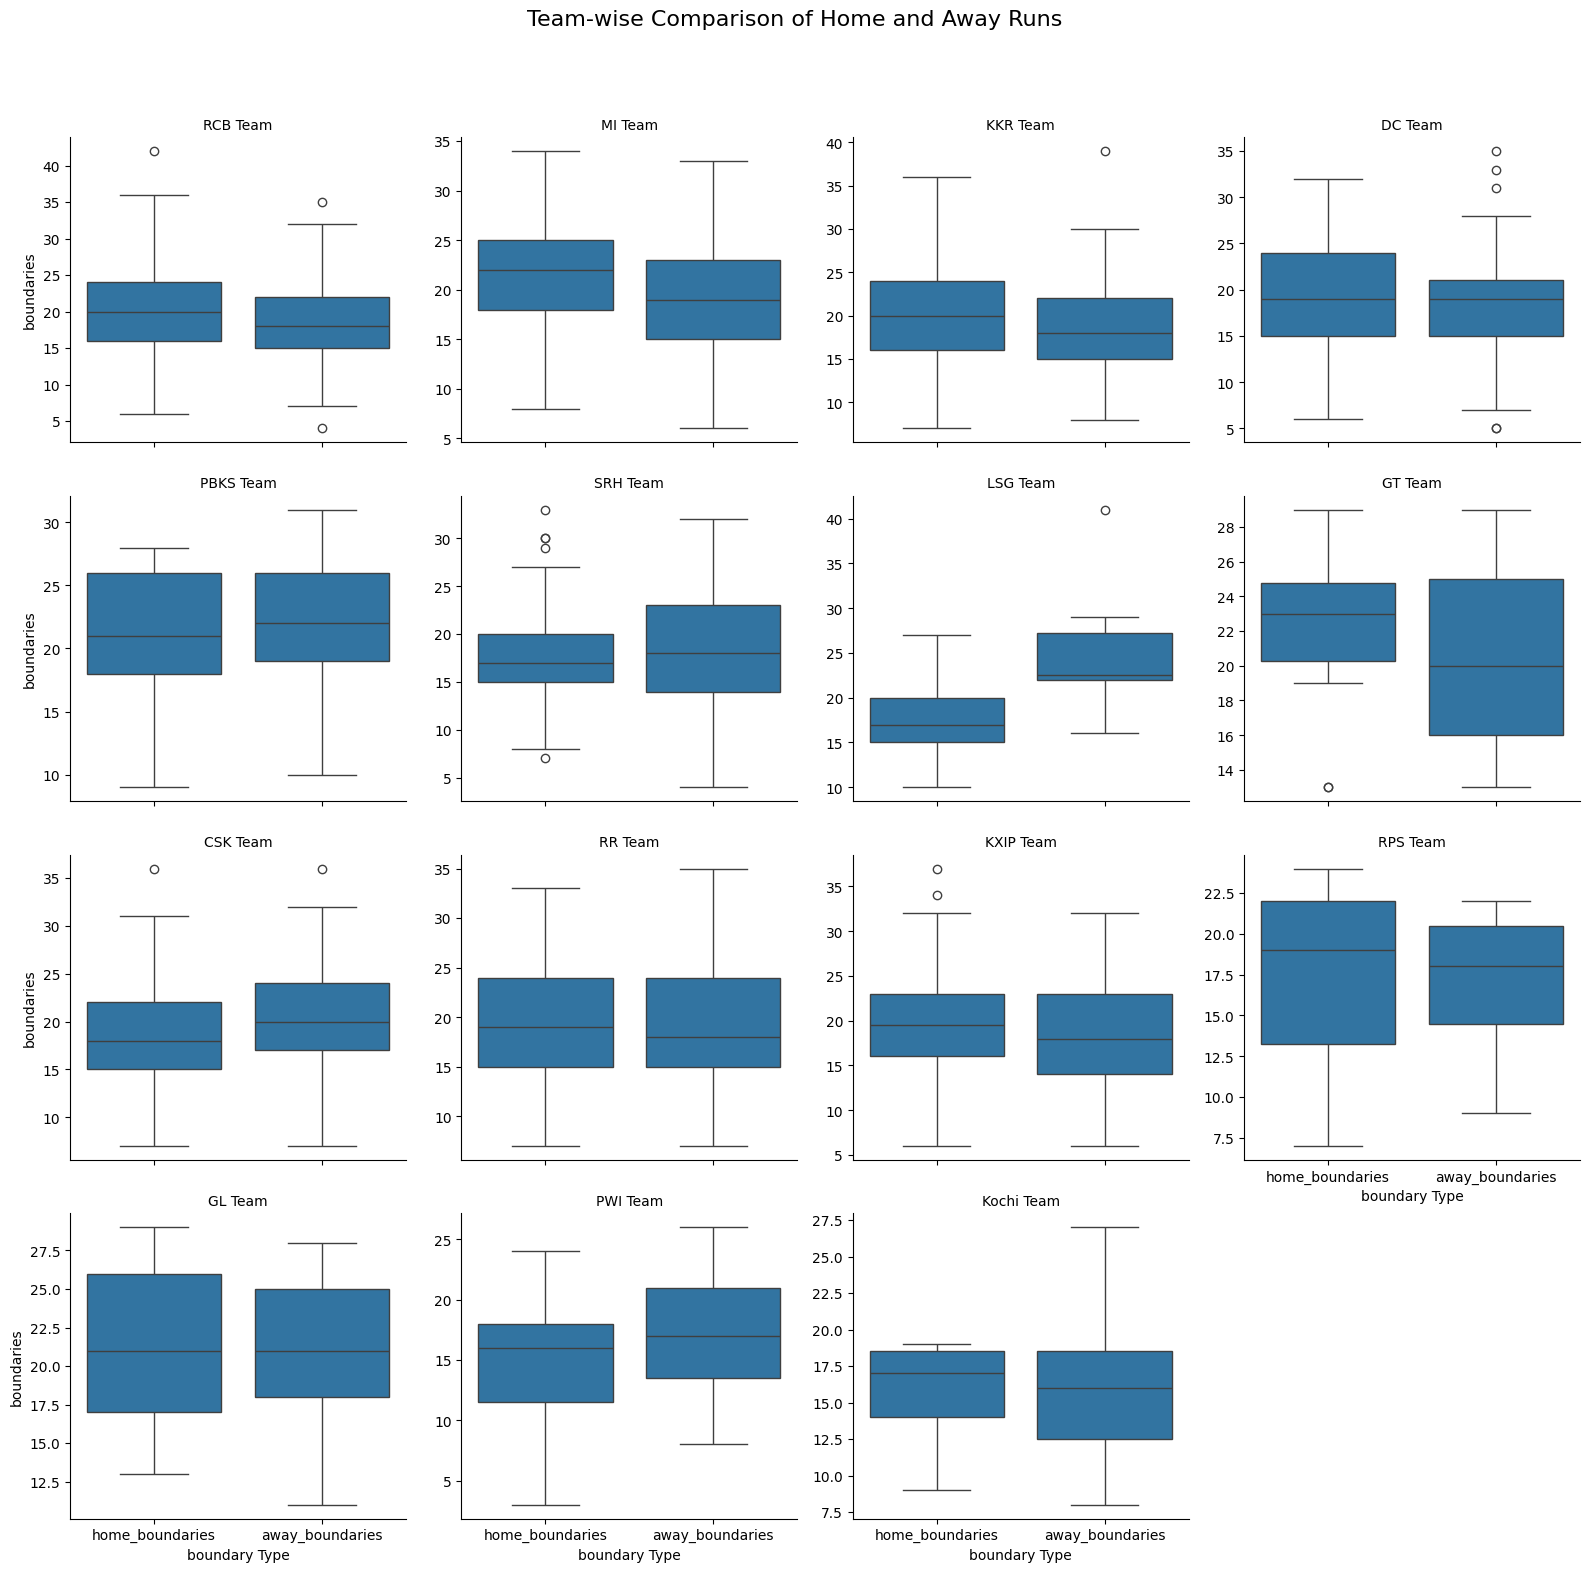

In [177]:
ipl_data_melted = pd.melt(ipl_data, 
                          id_vars=['home_team', 'away_team'], 
                          value_vars=['home_boundaries', 'away_boundaries'],
                          var_name='boundary_Type', 
                          value_name='boundaries')

ipl_data_melted['team'] = ipl_data_melted.apply(lambda row: row['home_team'] if row['boundary_Type'] == 'home_boundaries' else row['away_team'], axis=1)

ipl_data_melted = ipl_data_melted.drop(columns=['home_team', 'away_team'])

g = sns.FacetGrid(ipl_data_melted, col="team", col_wrap=4, height=4, sharey=False)

g.map(sns.boxplot, 'boundary_Type', 'boundaries')

g.set_titles("{col_name} Team")
g.set_axis_labels("boundary Type", "boundaries")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Team-wise Comparison of Home and Away Runs', fontsize=16)
plt.show()


### Categorical Variables

#### Frequency Counts and Percentages

In [178]:

def count_percentages(column):
    counts = ipl_data[column].value_counts()
    percentages = ipl_data[column].value_counts(normalize=True) * 100
    return pd.DataFrame({'Counts': counts, 'Percentage': percentages.round(2)})

count_percentages('season')


,Counts,Percentage
season,,
2023,69,7.68
2013,69,7.68
2012,68,7.56
2022,66,7.34
2011,66,7.34
2018,56,6.23
2014,56,6.23
2020,54,6.01
2019,54,6.01


 indicate expansion years or years with more matches

#### Top Winning Teams

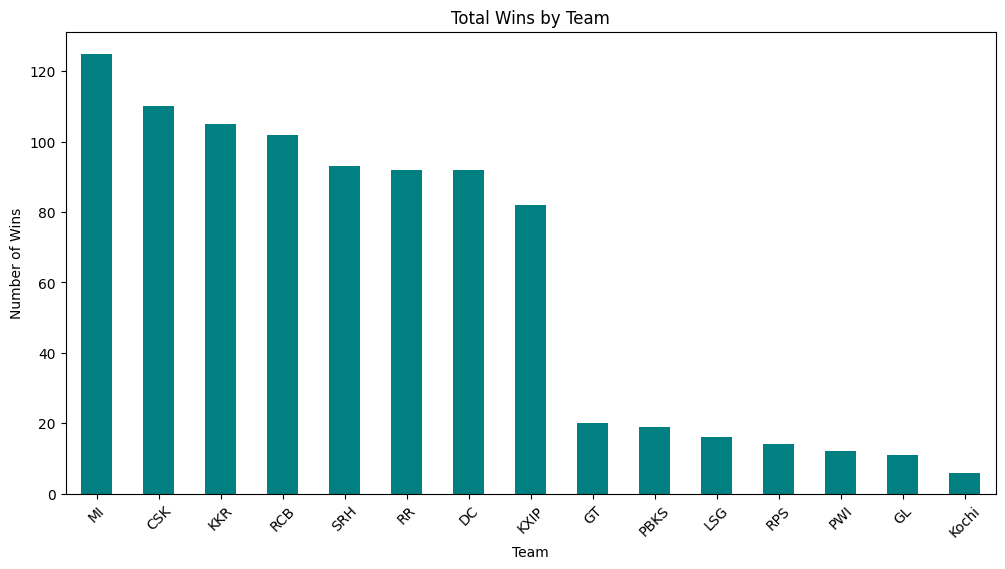

In [179]:
plt.figure(figsize=(12,6))
ipl_data['winner'].value_counts().plot(kind='bar', color='teal')
plt.title('Total Wins by Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()


Inference: Mumbai Indians has won the most number of matches followed by Chennai Super Kings and Kolkata Knight Riders. all these teams are the most successful teams in IPL history. 

but at 4th spot is RCb, which has never won the IPL title, but they are at 4th spot.

#### Most Common Venues

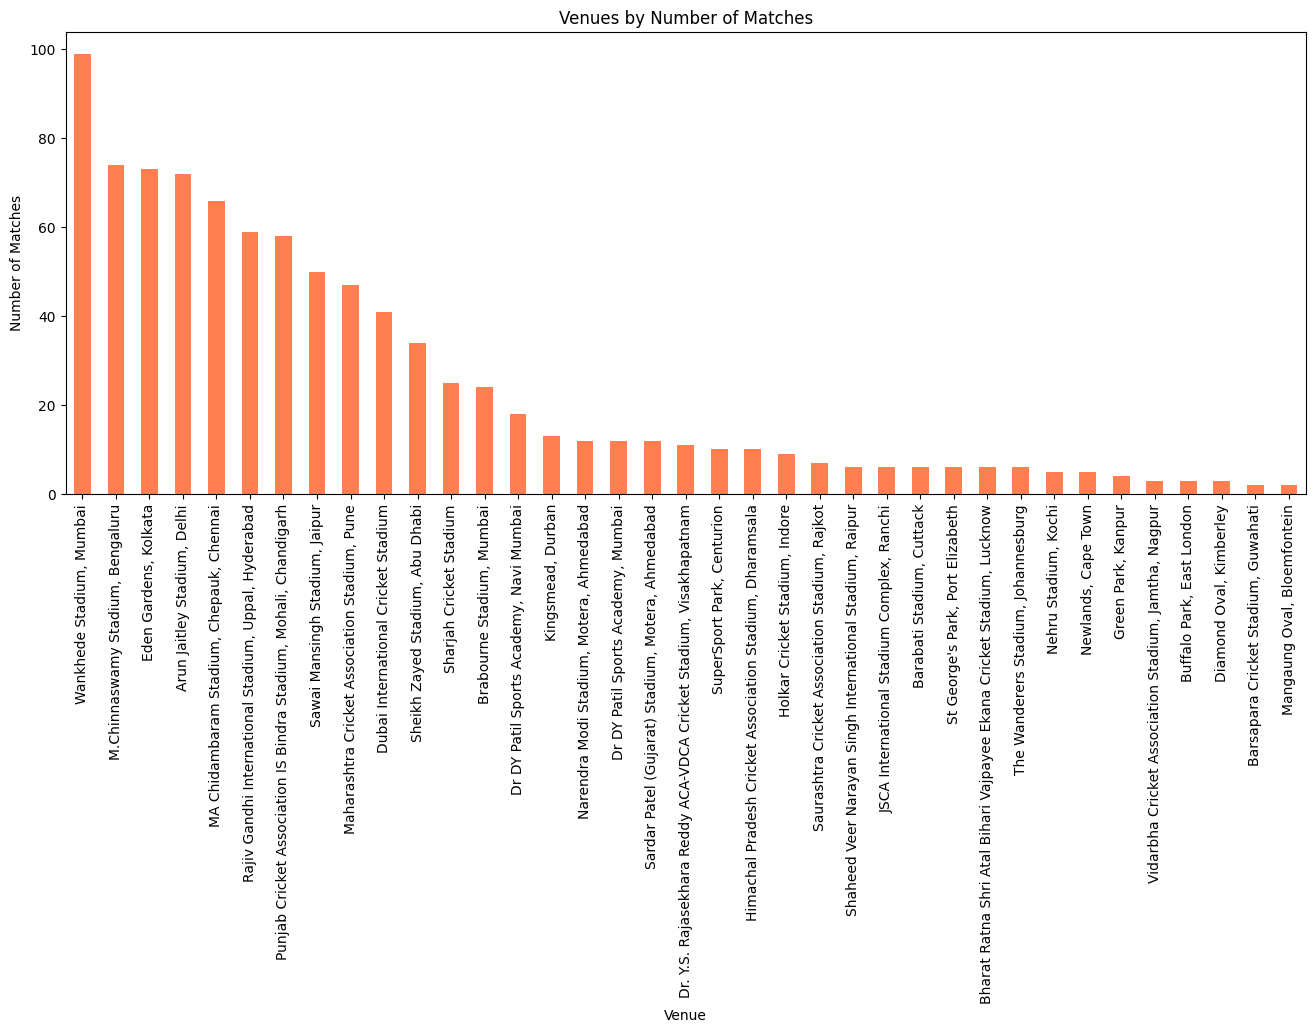

In [180]:
plt.figure(figsize=(16,6))
ipl_data['venue_name'].value_counts().plot(kind='bar', color='coral')
plt.title('Venues by Number of Matches')
plt.xlabel('Venue')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.show()


inference: wankhede stadium has hosted the most number of matches, which is also the place of most successful team in IPL history, Mumbai Indians.

rather CSK is also the most successful, but their home ground is at 4th spot.

#### Player of the Match Awards

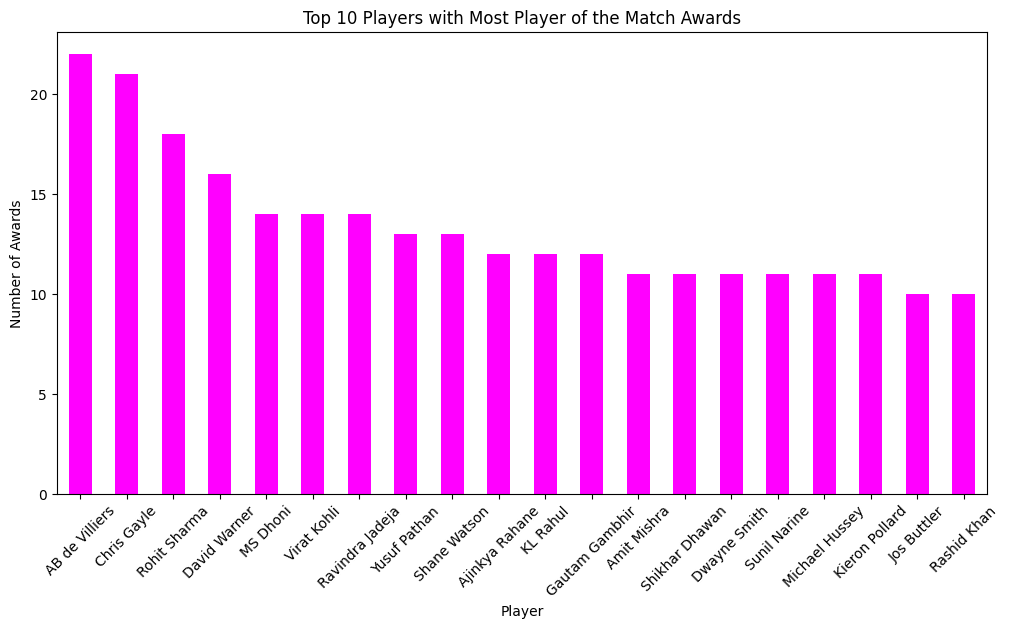

In [181]:
plt.figure(figsize=(12,6))
ipl_data['pom'].value_counts().head(20).plot(kind='bar', color='magenta')
plt.title('Top 10 Players with Most Player of the Match Awards')
plt.xlabel('Player')
plt.ylabel('Number of Awards')
plt.xticks(rotation=45)
plt.show()


Inference: This provide us of conclusion, why RCB has 4th spot in most wins, as they have the most number of player of the match awards in top 10.


#### Umpire Analysis
##### Most Frequent Umpires

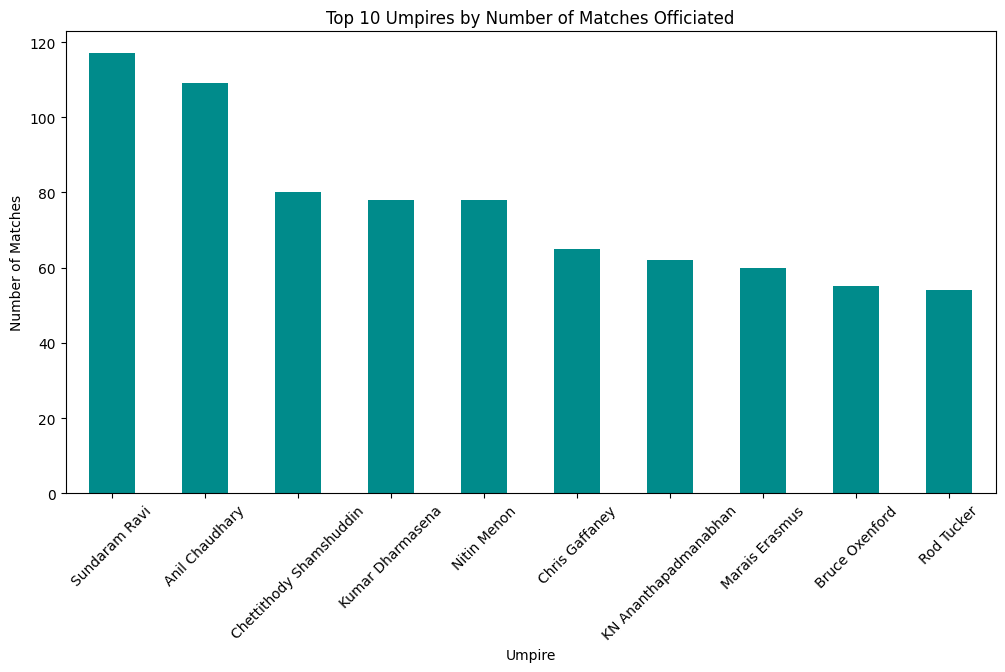

In [182]:
umpires = pd.concat([ipl_data['umpire1'], ipl_data['umpire2']])
plt.figure(figsize=(12,6))
umpires.value_counts().head(10).plot(kind='bar', color='darkcyan')
plt.title('Top 10 Umpires by Number of Matches Officiated')
plt.xlabel('Umpire')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()


#### Day of the Week Analysis

C:\Users\preet\AppData\Local\Temp\ipykernel_6384\3737155896.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='match_weekday', data=ipl_data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='Set3')


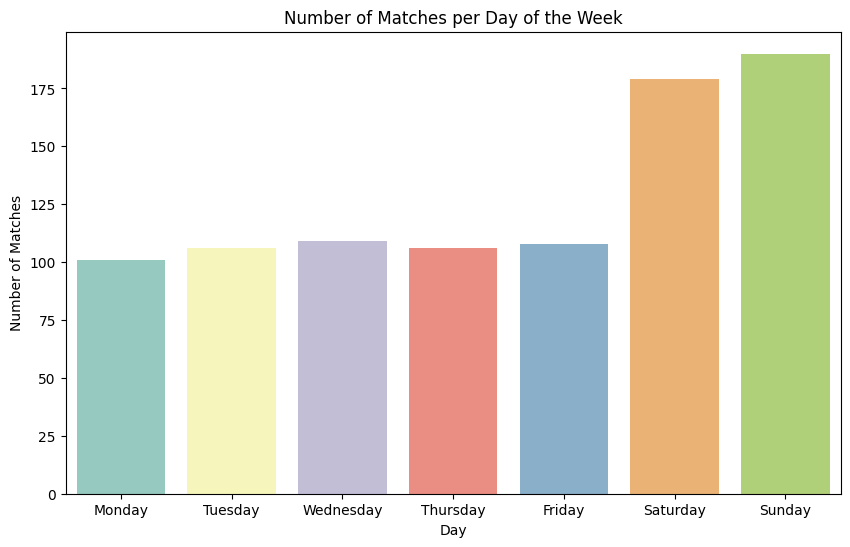

In [183]:
ipl_data['match_weekday'] = ipl_data['start_date'].dt.day_name()

plt.figure(figsize=(10,6))
sns.countplot(x='match_weekday', data=ipl_data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='Set3')
plt.title('Number of Matches per Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Matches')
plt.show()


inference: most matches are played on sunday, as it is a holiday in most of the countries,
 followed by saturday.

rest of the days have almost similar number of matches.

# Bivariate Analysis

### Numerical vs Numerical

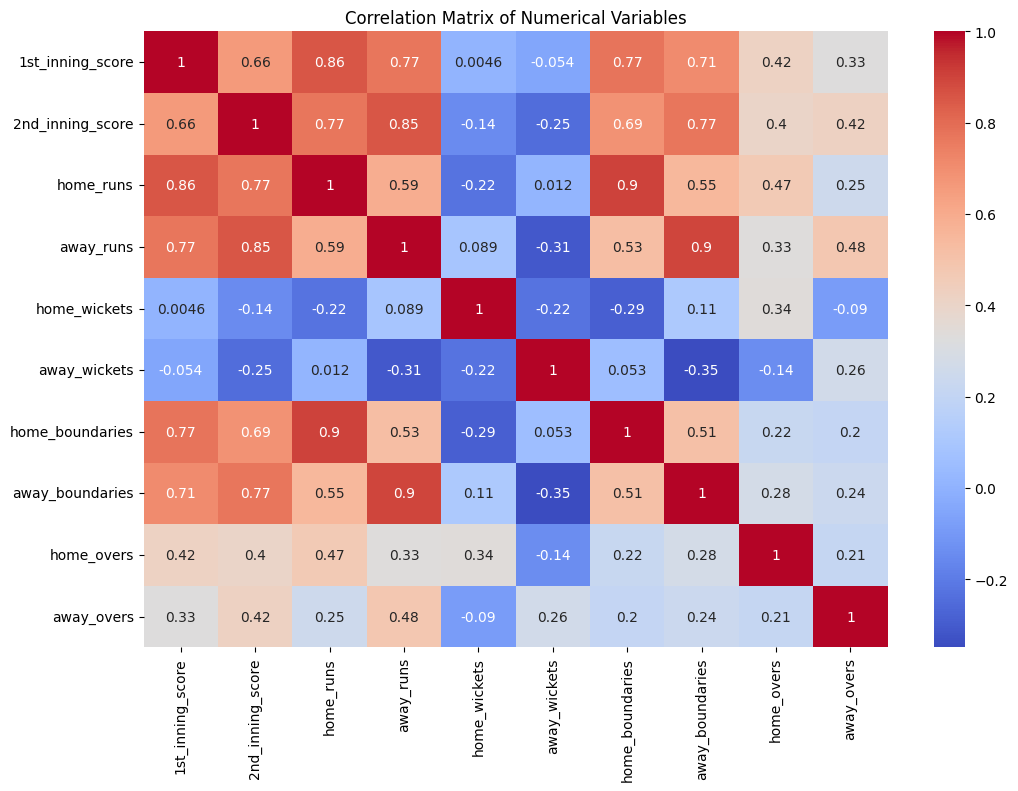

In [184]:

numerical_cols = ['1st_inning_score', '2nd_inning_score', 'home_runs', 'away_runs', 'home_wickets', 'away_wickets', 'home_boundaries', 'away_boundaries', 'home_overs', 'away_overs']

corr_matrix = ipl_data[numerical_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


inferene: 1st inning score and home runs has high correlation as compared to awar runs.

whereas 2nd inning score and away runs has high correlation as compared to home runs.

##### Home Runs vs Home Boundaries

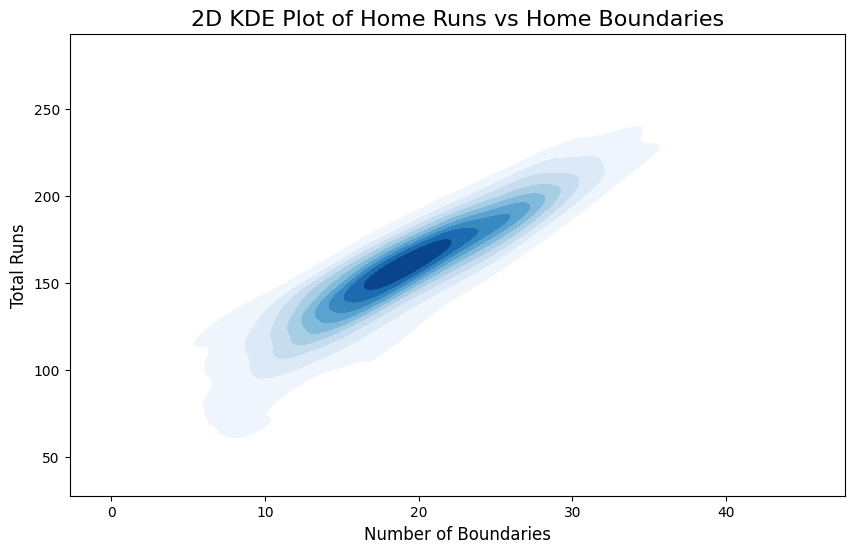

In [185]:
plt.figure(figsize=(10,6))

sns.kdeplot(x='home_boundaries', y='home_runs', data=ipl_data, cmap="Blues", fill=True)

plt.title('2D KDE Plot of Home Runs vs Home Boundaries', fontsize=16)
plt.xlabel('Number of Boundaries', fontsize=12)
plt.ylabel('Total Runs', fontsize=12)

plt.show()


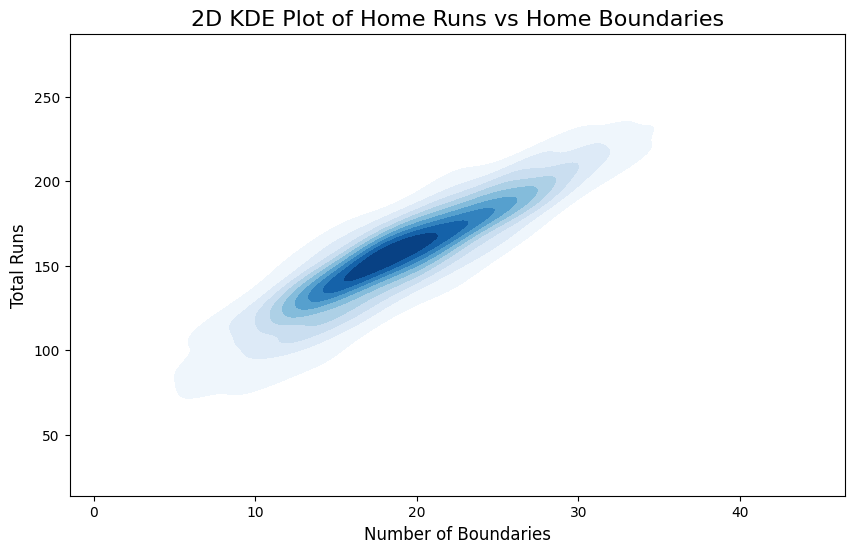

In [186]:
plt.figure(figsize=(10,6))

sns.kdeplot(x='away_boundaries', y='away_runs', data=ipl_data, cmap="Blues", fill=True)

plt.title('2D KDE Plot of Home Runs vs Home Boundaries', fontsize=16)
plt.xlabel('Number of Boundaries', fontsize=12)
plt.ylabel('Total Runs', fontsize=12)

plt.show()


#### Linear Regression between Boundaries and Runs

In [187]:

import statsmodels.api as sm

X_home = ipl_data['home_boundaries']
y_home = ipl_data['home_runs']
X_home = sm.add_constant(X_home) 

model_home = sm.OLS(y_home, X_home).fit()
print(model_home.summary())


                            OLS Regression Results                            
Dep. Variable:              home_runs   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     3905.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:48:59   Log-Likelihood:                -3627.2
No. Observations:                 899   AIC:                             7258.
Df Residuals:                     897   BIC:                             7268.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              64.4987      1.576     

High R-squared value indicates that a large portion of variance in home_runs is explained by home_boundaries

#### Numerical vs Categorical

In [188]:
import re

def parse_result(result):
    result_lower = result.lower()
    if 'won by' in result_lower:
        match = re.search(r'won by (\d+) (run|runs|wicket|wickets|wkt|wkts)', result_lower)
        if match:
            margin = int(match.group(1))
            win_by = match.group(2)
            if win_by.startswith('run'):
                win_by = 'runs'
            else:
                win_by = 'wickets'
            win_margin = {win_by: margin}
            return pd.Series({'margin': margin, 'win_by': win_by, 'win_margin': win_margin})
        else:
            return pd.Series({'margin': np.nan, 'win_by': np.nan, 'win_margin': {}})
    elif 'match tied' in result_lower:
        match = re.search(r'match tied \((.*) won', result_lower)
        if match:
            eliminator_winner = match.group(1).strip()
            win_margin = {'Tie': eliminator_winner}
        else:
            win_margin = {'Tie': None}
        return pd.Series({'margin': 0, 'win_by': 'Tie', 'win_margin': win_margin})
    elif 'no result' in result_lower or 'match abandoned' in result_lower:
        return pd.Series({'margin': np.nan, 'win_by': 'No Result', 'win_margin': {'No Result': None}})
    else:
        return pd.Series({'margin': np.nan, 'win_by': np.nan, 'win_margin': {}})


In [189]:
ipl_data[['margin', 'win_by', 'win_margin']] = ipl_data['result'].apply(parse_result)


#### Margin of Victory by Season

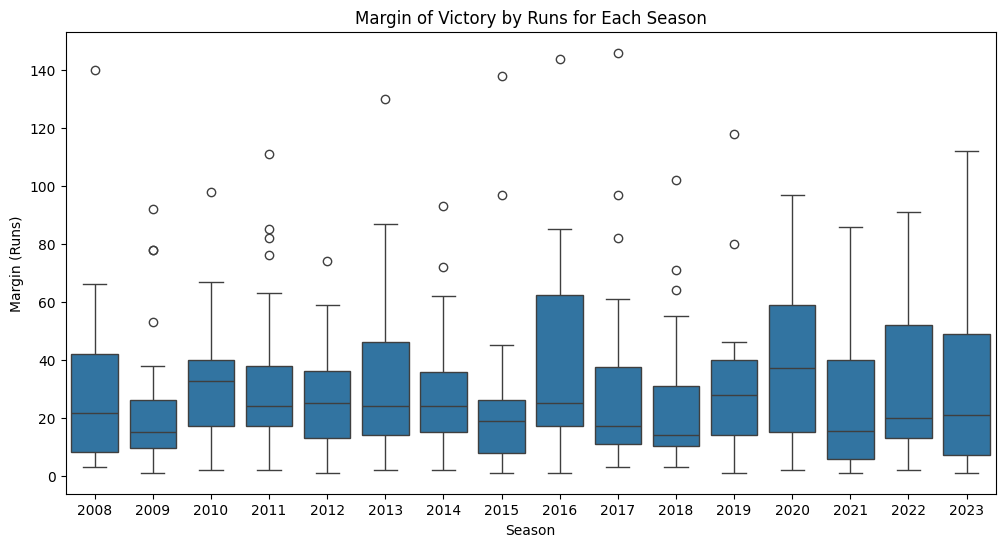

In [190]:
ipl = ipl_data[ipl_data['win_by'] == 'runs']

plt.figure(figsize=(12,6))
sns.boxplot(x='season', y='margin', data=ipl)
plt.title('Margin of Victory by Runs for Each Season')
plt.xlabel('Season')
plt.ylabel('Margin (Runs)')
plt.show()

##### Distribution of Runs by Venue

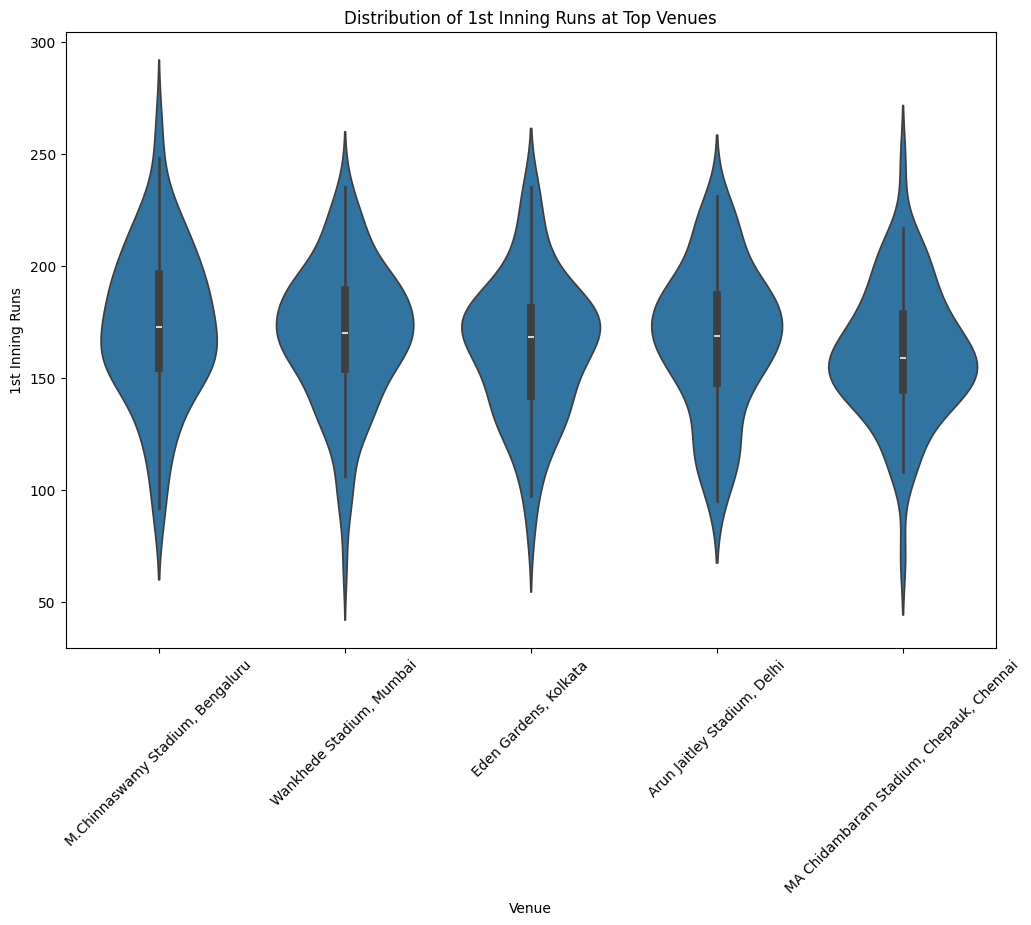

In [191]:
plt.figure(figsize=(12,8))
top_venues = ipl_data['venue_name'].value_counts().head(5).index
sns.violinplot(x='venue_name', y='1st_inning_score', data=ipl_data[ipl_data['venue_name'].isin(top_venues)])
plt.title('Distribution of 1st Inning Runs at Top Venues')
plt.xlabel('Venue')
plt.ylabel('1st Inning Runs')
plt.xticks(rotation=45)
plt.show()


inference: The distribution of runs is almost similar across all the top 2-3 venues. whereas we can some change in Chennai stadium.

Average Runs by Team

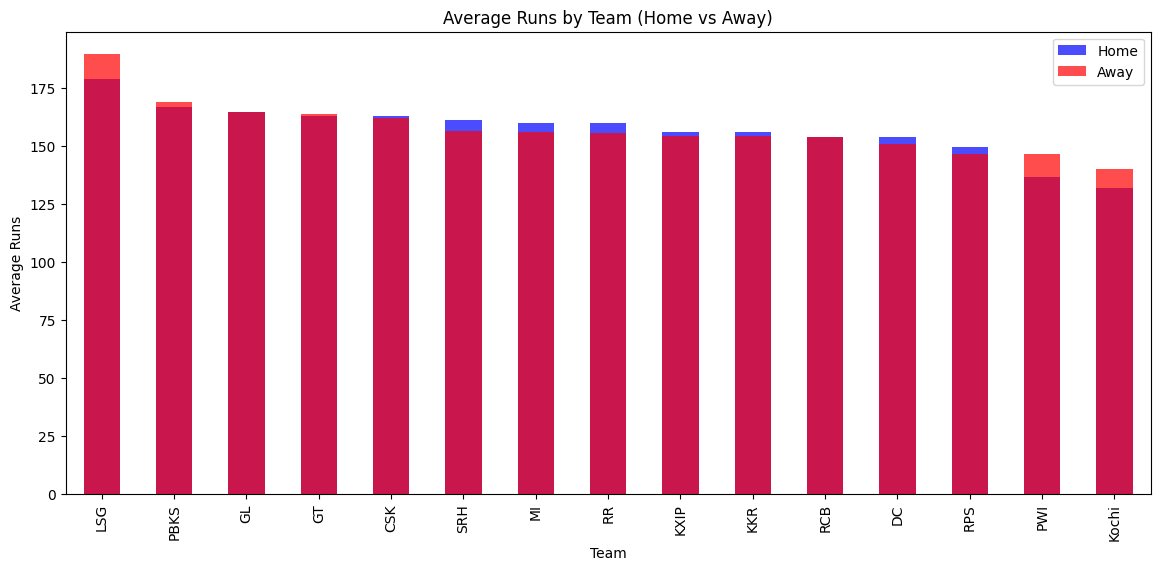

In [192]:
avg_runs_home = ipl_data.groupby('home_team')['home_runs'].mean().sort_values(ascending=False)
avg_runs_away = ipl_data.groupby('away_team')['away_runs'].mean().sort_values(ascending=False)

plt.figure(figsize=(14,6))
avg_runs_home.plot(kind='bar', color='blue', alpha=0.7, label='Home')
avg_runs_away.plot(kind='bar', color='red', alpha=0.7, label='Away')
plt.title('Average Runs by Team (Home vs Away)')
plt.xlabel('Team')
plt.ylabel('Average Runs')
plt.legend()
plt.show()


#### ANOVA Test
Does the Venue Affect the Runs Scored?

In [193]:
from scipy.stats import f_oneway

venues = ipl_data['venue_name'].value_counts().head(5).index
runs_by_venue = [ipl_data[ipl_data['venue_name'] == venue]['1st_inning_score'] for venue in venues]

F_statistic, p_value = f_oneway(*runs_by_venue)
print('ANOVA F-Statistic:', F_statistic)
print('p-value:', p_value)


ANOVA F-Statistic: 1.5470037879507026
p-value: 0.18792510076768368


inference: The p-value is greater than 0.05, which indicates that the venue does not affect the runs scored.

#####  Categorical vs Categorical

Relationship between Toss Decision and Match Outcome

In [194]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(ipl_data['decision'], ipl_data['winner'] == ipl_data['toss_won'])

chi2, p, dof, expected = chi2_contingency(contingency_table)
print('Chi-Square Statistic:', chi2)
print('p-value:', p)


Chi-Square Statistic: 9.032768325524938
p-value: 0.0026518258906221177


A low p-value indicates a significant association between the toss decision and  toss-winning team wins the match.

Heatmap of Team vs Venue Wins

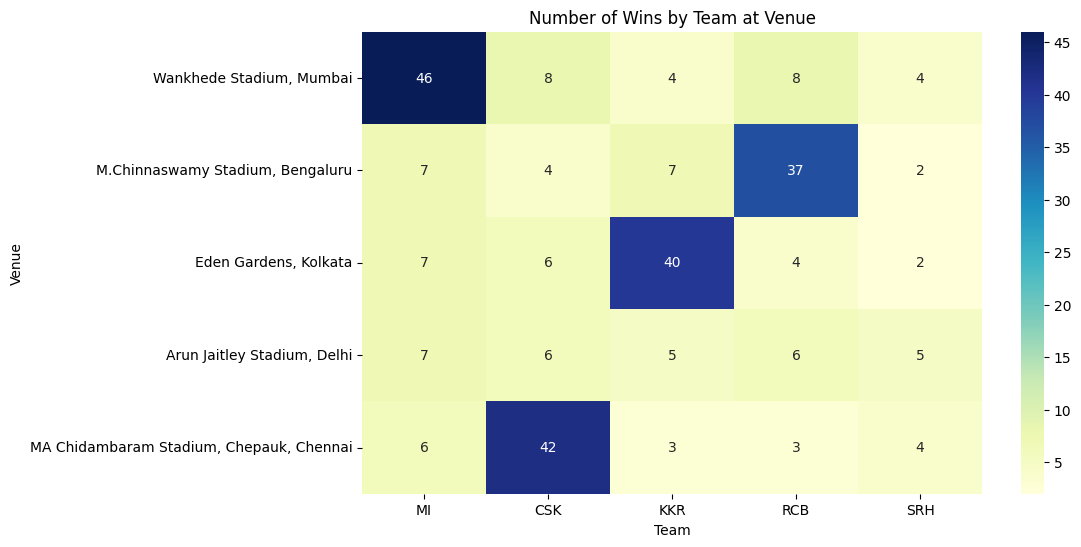

In [195]:

team_venue_wins = ipl_data.groupby(['venue_name', 'winner']).size().unstack(fill_value=0)

top_teams = ipl_data['winner'].value_counts().head(5).index
top_venues = ipl_data['venue_name'].value_counts().head(5).index
team_venue_wins = team_venue_wins.loc[top_venues, top_teams]

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(team_venue_wins, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Number of Wins by Team at Venue')
plt.xlabel('Team')
plt.ylabel('Venue')
plt.show()


Above suggests that as mumbai indians has won most of the matches at wankhede stadium, which is their home ground, they are most successful team in IPL history. 



Predicting Total Runs based on Multiple Factors

In [196]:

features = ['home_boundaries', 'home_wickets', 'home_overs']
X = ipl_data[features]
y = ipl_data['home_runs']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              home_runs   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     2581.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:49:03   Log-Likelihood:                -3362.3
No. Observations:                 899   AIC:                             6733.
Df Residuals:                     895   BIC:                             6752.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -15.1208      3.291     

Trend of Average Runs Over Seasons

<Figure size 1000x600 with 0 Axes>

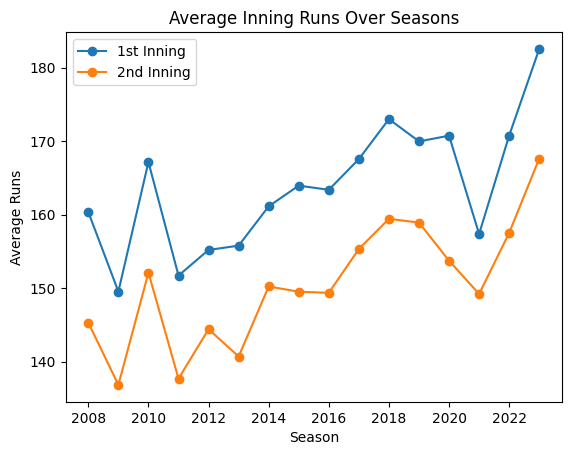

In [197]:

avg_runs_season = ipl_data.groupby('season')[['1st_inning_score', '2nd_inning_score']].mean()


plt.figure(figsize=(10,6))
avg_runs_season.plot(marker='o')
plt.title('Average Inning Runs Over Seasons')
plt.xlabel('Season')
plt.ylabel('Average Runs')
plt.legend(['1st Inning', '2nd Inning'])
plt.show()


Generally the average runs scored in a match has increased over the years. But there are dips also for few years.
For year 2021, the ipl was not held in india, which might be the reason.


Frequency and Outcome of Super Overs

C:\Users\preet\AppData\Local\Temp\ipykernel_6384\924802918.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='super_over_count', data=super_over_counts, palette='viridis')


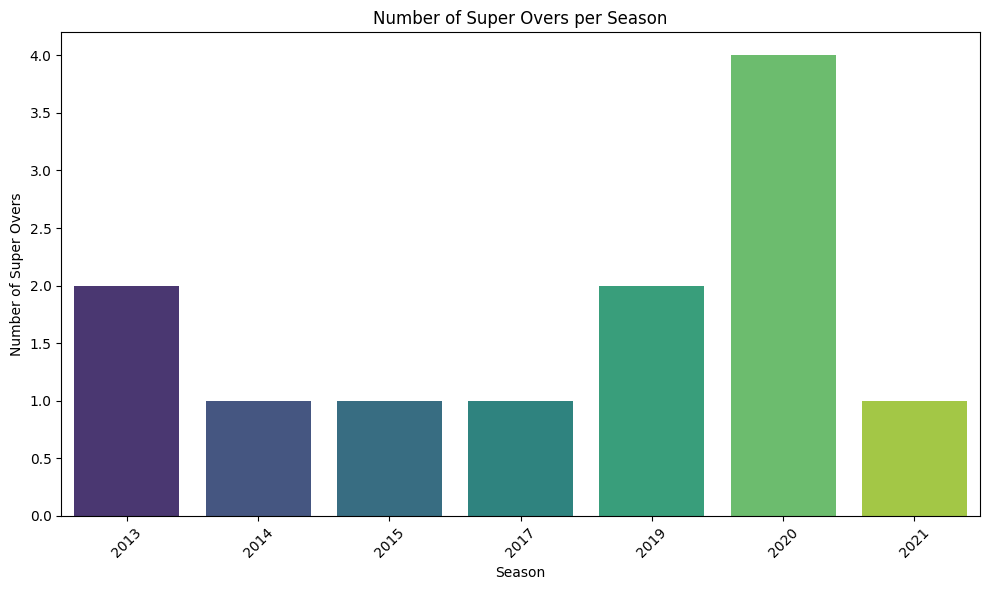

In [198]:

super_over_matches = ipl_data[ipl_data['super_over'] == True].copy()

super_over_matches['super_over_winner'] = super_over_matches['win_margin'].apply(lambda x: x.get('Tie') if 'Tie' in x else None)

super_over_counts = super_over_matches.groupby('season').size().reset_index(name='super_over_count')

plt.figure(figsize=(10,6))
sns.barplot(x='season', y='super_over_count', data=super_over_counts, palette='viridis')
plt.title('Number of Super Overs per Season')
plt.xlabel('Season')
plt.ylabel('Number of Super Overs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Inference:
The most superover is played in 2020, which was covid season. If this was a stunt by ipl authorities to increase the viewership, then it was successful. otherwise, it was just a coincidence.

# Final Note

This notebook covers the exploratory data analysis of the IPL dataset. We have analyzed the data from various perspectives and derived insights from it. The analysis can be further extended by including more datasets or by performing advanced analytics techniques.

The inference provides a good understanding of the dataset and can be used to make data-driven decisions in the future.